<a href="https://colab.research.google.com/github/RahulMimani-2024/Technological_Intervention_In_Tourism_Industry/blob/main/LSTM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM for foreign tourist arrival problem with regression framing
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from matplotlib.pyplot import figure
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=12):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/monthly_tourist_arrivals_india_2002-2018.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
print(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX)

In [ ]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(4, input_shape=(1, look_back)))
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Flatten())
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
es = EarlyStopping(monitor="val_loss",min_delta=0.0001, patience=20, verbose=1, mode='min', baseline=None,restore_best_weights=True) 
#model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
history = model.fit(trainX, trainY, epochs=200, batch_size=12,validation_data=(testX, testY), verbose=1,callbacks=[es])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 12)                1200      
                                                                 
 flatten_9 (Flatten)         (None, 12)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11/11 [==============================] - 2s 49ms/step - loss: 0.0880 - val_loss: 0.2859
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0443 - v

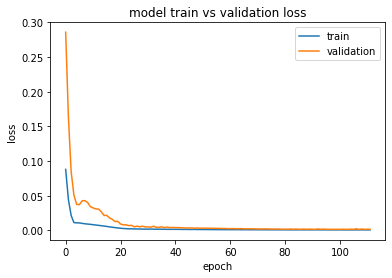

In [ ]:
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
fig.savefig('Data\Val_Loss_Graph.png', bbox_inches='tight')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
#for forecasting
forecast_size=18
step_count=look_back
X_input = numpy.asarray(dataset[len(dataset)-step_count:len(dataset),:]).astype('float32')
T_input=list(X_input)
features_count=1
Output=[]
i=0
while(i<forecast_size):
    
    if(len(T_input)>step_count):
        X_input=numpy.asarray(T_input[1:]).astype('float32')
        print("{} month input {}".format(i,X_input))
        X_input = X_input.reshape((1, features_count,step_count))
        prediction_value = model.predict(X_input, verbose=0) #predict the value
        prediction_value_2=prediction_value
        prediction_value_2=scaler.inverse_transform(prediction_value_2)
        print("{} month output {}".format(i,prediction_value))
        T_input.append(prediction_value[0][0])#store predicted output to work as input for next iteration
        T_input=T_input[1:] #remove the first value as we inserted new value
        Output.append(prediction_value_2[0][0])#store all the predicted value
        i=i+1
        print(prediction_value[0][0])
    else:
        X_input = X_input.reshape((1,features_count,step_count))
        prediction_value = model.predict(X_input, verbose=0)
        prediction_value_2=prediction_value
        prediction_value_2=scaler.inverse_transform(prediction_value_2)
        print(prediction_value[0])
        T_input.append(prediction_value[0][0])
        Output.append(prediction_value_2[0][0])
        i=i+1
        print(prediction_value[0][0])


print(Output)
Previous_data_length=len(dataset)
new_data=numpy.arange(Previous_data_length,Previous_data_length + forecast_size)


[0.9561035]
0.9561035
1 month input [0.8727333  0.7668194  0.58094996 0.43266702 0.53451973 0.61336386
 0.60606974 0.5617287  0.7404092  0.87665516 1.         0.9561035 ]
1 month output [[0.9313306]]
0.9313306
2 month input [0.7668194  0.58094996 0.43266702 0.53451973 0.61336386 0.60606974
 0.5617287  0.7404092  0.87665516 1.         0.9561035  0.9313306 ]
2 month output [[0.8190513]]
0.8190513
3 month input [0.58094996 0.43266702 0.53451973 0.61336386 0.60606974 0.5617287
 0.7404092  0.87665516 1.         0.9561035  0.9313306  0.8190513 ]
3 month output [[0.6385274]]
0.6385274
4 month input [0.43266702 0.53451973 0.61336386 0.60606974 0.5617287  0.7404092
 0.87665516 1.         0.9561035  0.9313306  0.8190513  0.6385274 ]
4 month output [[0.5318638]]
0.5318638
5 month input [0.53451973 0.61336386 0.60606974 0.5617287  0.7404092  0.87665516
 1.         0.9561035  0.9313306  0.8190513  0.6385274  0.5318638 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

5 month output [[0.58339405]]
0.58339405
6 month input [0.61336386 0.60606974 0.5617287  0.7404092  0.87665516 1.
 0.9561035  0.9313306  0.8190513  0.6385274  0.5318638  0.58339405]
6 month output [[0.6356942]]
0.6356942
7 month input [0.60606974 0.5617287  0.7404092  0.87665516 1.         0.9561035
 0.9313306  0.8190513  0.6385274  0.5318638  0.58339405 0.6356942 ]
7 month output [[0.632486]]
0.632486
8 month input [0.5617287  0.7404092  0.87665516 1.         0.9561035  0.9313306
 0.8190513  0.6385274  0.5318638  0.58339405 0.6356942  0.632486  ]
8 month output [[0.62678736]]
0.62678736
9 month input [0.7404092  0.87665516 1.         0.9561035  0.9313306  0.8190513
 0.6385274  0.5318638  0.58339405 0.6356942  0.632486   0.62678736]
9 month output [[0.7774045]]
0.7774045
10 month input [0.87665516 1.         0.9561035  0.9313306  0.8190513  0.6385274
 0.5318638  0.58339405 0.6356942  0.632486   0.62678736 0.7774045 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

10 month output [[0.93114084]]
0.93114084
11 month input [1.         0.9561035  0.9313306  0.8190513  0.6385274  0.5318638
 0.58339405 0.6356942  0.632486   0.62678736 0.7774045  0.93114084]
11 month output [[1.0281307]]
1.0281307
12 month input [0.9561035  0.9313306  0.8190513  0.6385274  0.5318638  0.58339405
 0.6356942  0.632486   0.62678736 0.7774045  0.93114084 1.0281307 ]
12 month output [[1.0177854]]
1.0177854
13 month input [0.9313306  0.8190513  0.6385274  0.5318638  0.58339405 0.6356942
 0.632486   0.62678736 0.7774045  0.93114084 1.0281307  1.0177854 ]
13 month output [[0.9816355]]
0.9816355
14 month input [0.8190513  0.6385274  0.5318638  0.58339405 0.6356942  0.632486
 0.62678736 0.7774045  0.93114084 1.0281307  1.0177854  0.9816355 ]
14 month output [[0.8631462]]
0.8631462
15 month input [0.6385274  0.5318638  0.58339405 0.6356942  0.632486   0.62678736
 0.7774045  0.93114084 1.0281307  1.0177854  0.9816355  0.8631462 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


15 month output [[0.6985299]]
0.6985299
16 month input [0.5318638  0.58339405 0.6356942  0.632486   0.62678736 0.7774045
 0.93114084 1.0281307  1.0177854  0.9816355  0.8631462  0.6985299 ]
16 month output [[0.6082142]]
0.6082142
17 month input [0.58339405 0.6356942  0.632486   0.62678736 0.7774045  0.93114084
 1.0281307  1.0177854  0.9816355  0.8631462  0.6985299  0.6082142 ]
17 month output [[0.6329013]]
0.6329013
[1178081.0, 1151223.1, 1029493.94, 833776.4, 718135.56, 774002.8, 830704.75, 827226.5, 821048.25, 984341.94, 1151017.4, 1256170.2, 1244954.4, 1205761.9, 1077300.0, 898828.94, 800911.94, 827676.8]


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, numpy.ndarray), 
                isinstance(predicted, numpy.ndarray)]):
        actual, predicted = numpy.array(actual),
        numpy.array(predicted)
  
    return round(
        numpy.mean(
            numpy.abs(predicted - actual) / 
            ((numpy.abs(predicted) + numpy.abs(actual))/2)
        )*100, 2
    )
  
  # to calculate mape
def MAPE(Y_actual,Y_Predicted):
    mape = numpy.mean(numpy.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
 

In [ ]:
# calculate-store-print the benchmarks
Benchmarks=[]
train_RMSE =[ "Train :",math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])),"RMSE"]
Benchmarks.append(train_RMSE)
test_RMSE =[ "Test :",math.sqrt(mean_squared_error(testY[0], testPredict[:,0])),"RMSE"]
Benchmarks.append(test_RMSE)
train_MAPE=[ "Train :",MAPE(trainY[0],trainPredict[:,0]),"MAPE"]
Benchmarks.append(train_MAPE)
test_MAPE=[ "Test :",MAPE(testY[0],testPredict[:,0]),"MAPE"]
Benchmarks.append(test_MAPE)
train_SMAPE=[ "Train :",calculate_smape(trainY[0],trainPredict[:,0]),"SMAPE"]
Benchmarks.append(train_SMAPE)
test_SMAPE=[ "Test :",calculate_smape(testY[0],testPredict[:,0]),"SMAPE"]
Benchmarks.append(test_SMAPE)
train_MAE=[ "Train :",mean_absolute_error(trainY[0],trainPredict[:,0]),"MAE"]
Benchmarks.append(train_MAE)
test_MAE=[ "Test :",mean_absolute_error(testY[0],testPredict[:,0]),"MAE"]
Benchmarks.append(test_MAE)

numpy.savetxt("Data\Benchmarks.csv", Benchmarks, delimiter=", ", header="Train/Test Benchmarks, Value , Type", fmt='% s')
Benchmarks_dataframe = read_csv("Data\Benchmarks.csv")
print(Benchmarks_dataframe)

  # Train/Test Benchmarks        Value     Type
0                 Train :  28776.195755    RMSE
1                  Test :  42123.311372    RMSE
2                 Train :      5.366308    MAPE
3                  Test :      4.186228    MAPE
4                 Train :      5.240000   SMAPE
5                  Test :      4.180000   SMAPE
6                 Train :  22279.802318     MAE
7                  Test :  33303.471088     MAE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

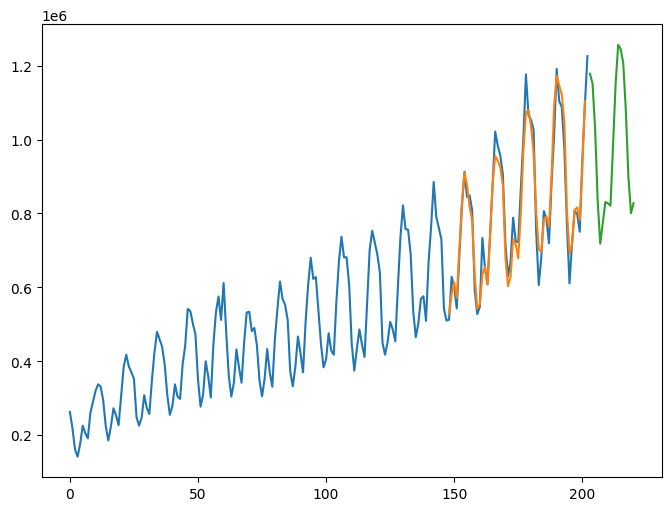

In [ ]:
# plot baseline and predictions
fig2=figure(figsize=(8, 6), dpi=100)
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(new_data,Output)
fig2.savefig('Data\FInal_Output.png', bbox_inches='tight')
plt.show()